# I mainly show what the grammar extraction looks like

### initialise notebook and logger

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)
dataset_fname = 'toolsdata/bursi.pos.gspan'

## first we test the core/interface extractor, since it is most essential

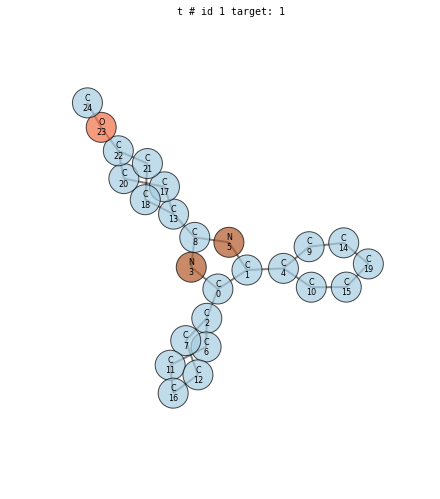

here we see some CIPS with their cores marked


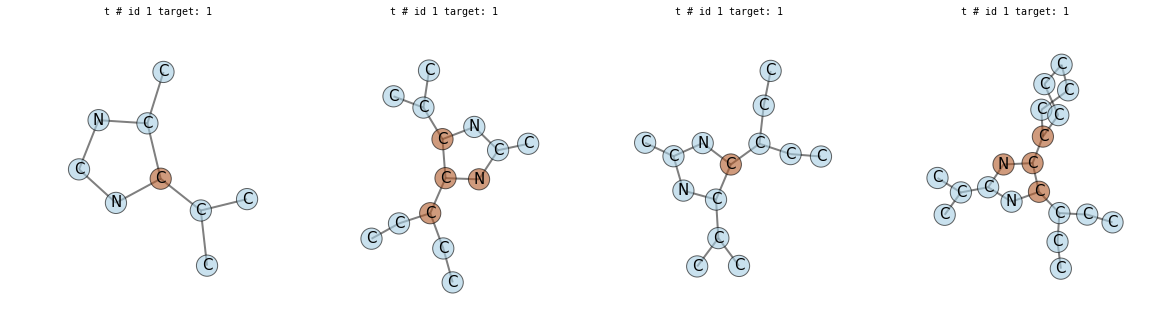

In [3]:
import graphlearn.utils.draw as draw
from graphlearn.decompose import extract_core_and_interface

from eden.graph import Vectorizer
vectorizer=Vectorizer()

#get a graph and see what it looks like
graphs = get_graphs(dataset_fname)
graph = next(graphs)
draw.graphlearn(graph, size=8, font_size=8, secondary_vertex_label='ID',
        colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
        vertex_alpha=0.7, node_size=900)



# set some parameters and extract CIPS 
radius_list=[0,1]
thickness_list=[2,3]
cip=extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)


# beautify and draw
print 'here we see some CIPS with their cores marked'
graph=draw.cip_to_drawable_graph(cip)
draw.graphlearn(graph,
              n_graphs_per_line=7, size=5, 
              colormap='Paired', invert_colormap=False,node_border=1,
              vertex_alpha=0.6, edge_alpha=0.5, node_size=450)

## demonstrating more extract core

each row is showing 3 cips from the same graph


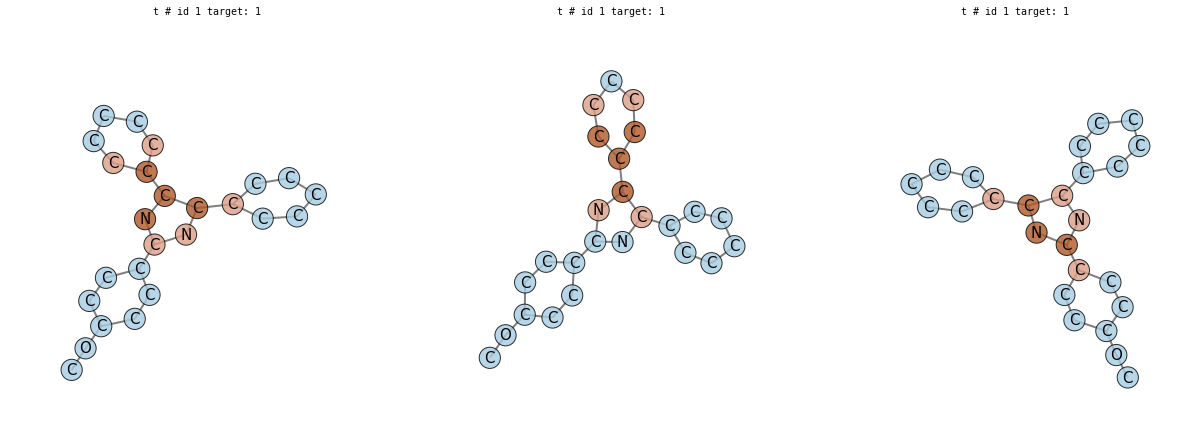

each row is showing 3 cips from the same graph


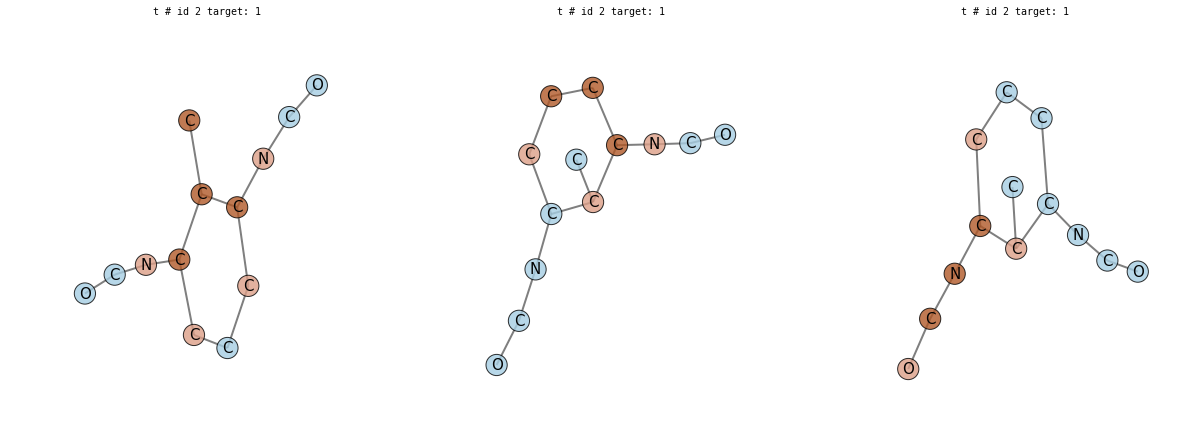

each row is showing 3 cips from the same graph


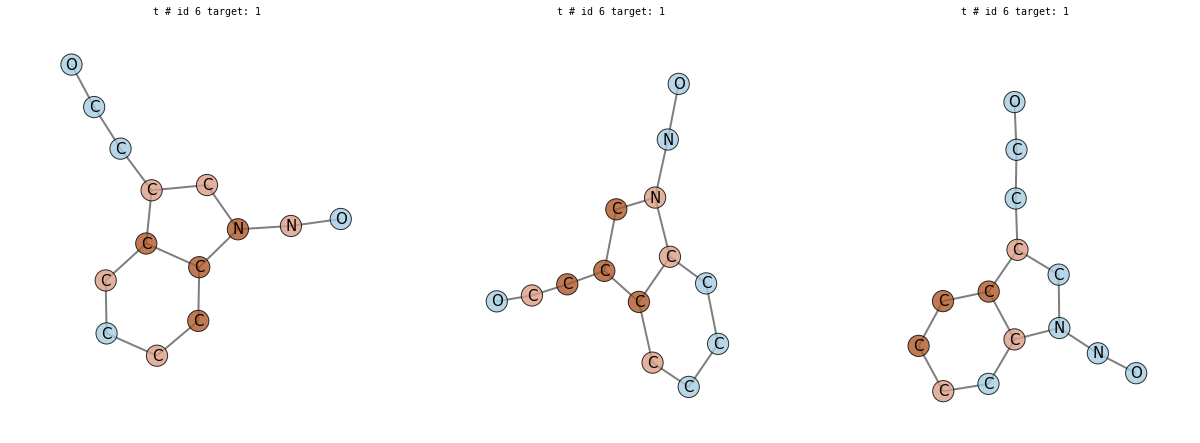

each row is showing 3 cips from the same graph


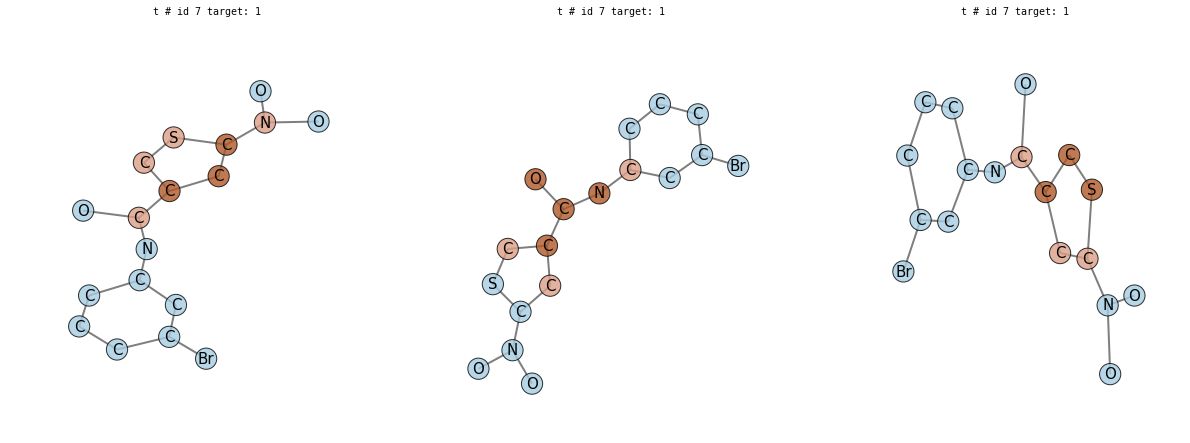

each row is showing 3 cips from the same graph


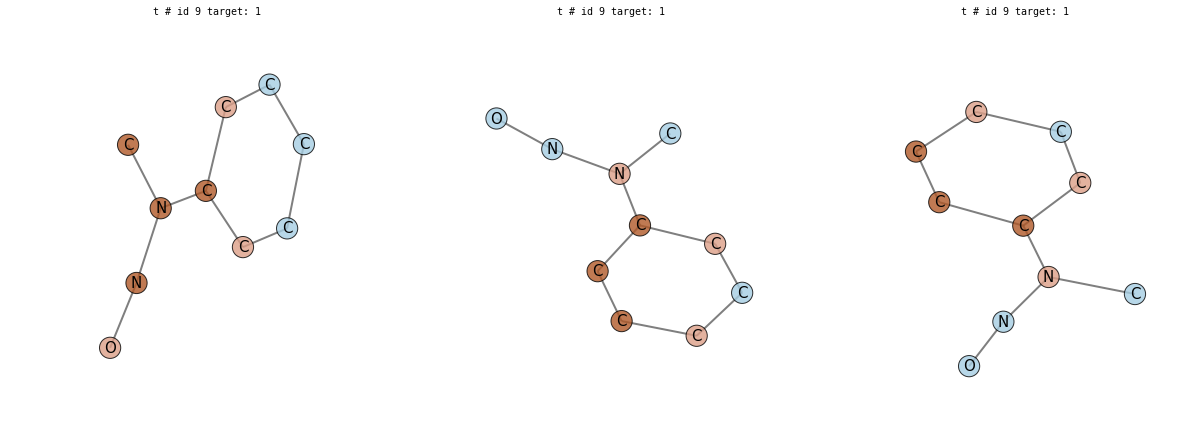

In [4]:
from eden.converter.graph.gspan import gspan_to_eden
import graphlearn.utils.draw 
from graphlearn.decompose import extract_core_and_interface
from eden.graph import Vectorizer
graphs = get_graphs(dataset_fname, size=5)
for graph in graphs:
    graphs_list=[]
    for node in range(1,4):
        cips = extract_core_and_interface(node,graph,radius_list=[2],thickness_list=[1],vectorizer=Vectorizer())
        # draw cip on the original graph and save in nice_graphs
        cip_graphs = draw.cip_to_drawable_graph(cips,[graph]*len(cips))
        for g,c in zip(cip_graphs,cips):
            g.graph['info'] = str(c.interface_hash)
        graphs_list += cip_graphs
    # draw marked graphs
    
    print 'each row is showing 3 cips from the same graph'
    draw.graphlearn(graphs_list, contract=False,
                              n_graphs_per_line=5, size=7, colormap='Paired', invert_colormap=False,node_border=1,
                              vertex_alpha=0.8, edge_alpha=0.5, node_size=450)

## Demonstrating the filter function

In [5]:
#get a graph
graphs = get_graphs(dataset_fname, size=1)
graph = next(graphs)
import  graphlearn.utils.draw as draw
import  graphlearn.graph as tools
from eden.util import display as edisp
from eden.graph import Vectorizer
vectorizer=Vectorizer()

print 'We work on this graph'
draw.graphlearn(graph, size=10, secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
                   vertex_alpha=0.5, node_size=650)

def show(cips):
    graphs=draw.cip_to_drawable_graph(cips)
    draw.graphlearn(graphs, n_graphs_per_line=7, size=5,
                              colormap='Paired', invert_colormap=False,node_border=1,
                              vertex_alpha=0.6, edge_alpha=0.2, node_size=450)
    
radius_list=[0,1,2]
thickness_list=[1,2]
graph.node[1]['no_root']=True
#lets see.. without filter:

cips=tools.extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'no filter'
show(cips)


# lets do the same but with the filter
cips=tools.extract_core_and_interface(1,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter: nothing should appear,,,'
show(cips)

# filter is ignoring unfiltered things:
cips=tools.extract_core_and_interface(2,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but we chose node 2 as root'
show(cips)

# no core attribute
graph.node[1]["not_in_core"]=True
graph.node[1].pop('no_root')
cips=tools.extract_core_and_interface(2,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up'
show(cips)

ImportError: No module named graph

.